## Final Project Submission

Please fill out:
* Student name: **Joongsuk Jin**
* Student pace: **Part Time**
* Scheduled project review date/time: 
* Instructor name: **Joe**
* Blog post URL:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime


<div class="alert alert-block alert-info">
<b>

## Overview Plan

1. Initial Exploratory Data Analysis - Data visualization, Understanding variables
3. Clean Data - Null value, Dummy vairalbes, data types etc
4. Data Distribution analysis - Data Scaling, Check Ligression Analysis Assumptions (Linearlity, Normality)
5. Variable Analysis - Colinearlity? 
6. Varible Selection Methods
7. Test Multiple Multivariate Linear Regression models
8. Model Validation
9. Conclusion 

</div>


### 1. Initial Look at Data


In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
data.shape

(21597, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB



#### Based on the initial look at the data. Followings are needed
#### - Data type
#### - Null value handling


### a. Data Type
#### - Categorical Data Stored as Integers / float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [9]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [10]:
data['waterfront'] = data['waterfront'].astype('category',ordered=True)
data['view'] = data['view'].astype('category',ordered=True)
data['condition'] = data['condition'].astype('category',ordered=True)
data['grade'] = data['grade'].astype('category',ordered=False)
data['floors'] = data['floors'].astype('category',ordered=False)

data['zipcode'] = data['zipcode'].astype(str)
data['date'] = data['date'].astype('datetime64[ns]')



# yr_renovated can not be converted to int since there are null values. it will be converted to int after removing nulls

C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\s

### Null Value Clean up

In [11]:
data[pd.to_numeric(data['sqft_basement'], errors='coerce').isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,2014-07-07,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,2015-03-23,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,2014-09-16,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
115,3626039325,2014-11-21,740500.0,3,3.50,4380,6350,2.0,0.0,0.0,...,8,2780,?,1900,NaN,98117,47.6981,-122.368,1830,6350
217,1909600046,2014-07-03,445838.0,3,2.50,2250,5692,2.0,0.0,0.0,...,8,2250,?,2000,0.0,98146,47.5133,-122.379,1320,5390
309,3204800200,2015-01-08,665000.0,4,2.75,3320,10574,2.0,NaN,0.0,...,8,2220,?,1960,0.0,98056,47.5376,-122.180,2720,8330
384,713500030,2014-07-28,1350000.0,5,3.50,4800,14984,2.0,0.0,2.0,...,11,3480,?,1998,0.0,98006,47.5543,-122.148,4050,19009
508,5113400431,2014-05-08,615000.0,2,1.00,1540,6872,1.0,0.0,0.0,...,7,820,?,1946,0.0,98119,47.6454,-122.373,1420,5538


### Identified values of "?" in *sqft_basement*

In [12]:
len(data[pd.to_numeric(data['sqft_basement'], errors='coerce').isnull()]) /len(data) * 100  # 2% seems small portion to drop

2.1021438162707784

In [13]:
data.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [14]:
data.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
1008.0        1
2130.0        1
1913.0        1
1284.0        1
2190.0        1
2500.0        1
2120.0        1
1920.0        1
652.0         1
768.0         1
374.0         1
666.0         1
792.0         1
508.0         1
475.0         1
2300.0        1
862.0         1
3260.0        1
2350.0        1
1852.0        1
2400.0        1
875.0         1
1024.0        1
417.0         1
2600.0        1
2610.0        1
915.0         1
1880.0        1
2720.0        1
2850.0        1
Name: sqft_basement, Len

In [15]:
data = data[pd.to_numeric(data['sqft_basement'], errors='coerce').notna()]

#### ? vlaues in *sqft_basement* columns are removed

In [16]:
data.sqft_basement = data.sqft_basement.astype(float).astype(int)

C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
data.sqft_basement.dtype

dtype('int32')

In [18]:
data.sqft_basement

0           0
1         400
2           0
3         910
4           0
5        1530
7           0
8         730
9           0
10       1700
11        300
12          0
13          0
14          0
15        970
16          0
17          0
19          0
20        760
21        720
22          0
23          0
24          0
25          0
26        700
27          0
28        730
29          0
30          0
31          0
         ... 
21566     280
21567       0
21568     320
21569       0
21570       0
21571       0
21572     190
21573       0
21574    1800
21575       0
21576       0
21577       0
21578       0
21579      50
21580       0
21582       0
21583       0
21584       0
21585       0
21586       0
21587       0
21588       0
21589       0
21590     910
21591     130
21592       0
21593       0
21594       0
21595       0
21596       0
Name: sqft_basement, Length: 21143, dtype: int32

#### converted *sqft_basement* into integer

In [19]:
data.info() #Confirm all the variables data type is changed to 'category'
            #sqft_basement data type changed to 'int'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
id               21143 non-null int64
date             21143 non-null datetime64[ns]
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null category
waterfront       18804 non-null category
view             21082 non-null category
condition        21143 non-null category
grade            21143 non-null category
sqft_above       21143 non-null int64
sqft_basement    21143 non-null int32
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null object
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: category(5), datetime64[ns](1), float64(5), int32(

### b. Null values


In [20]:
from IPython.display import display
pd.options.display.max_columns = None

display(data.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### There are 3 columns with null values  *watetfront, view, yr_renovated*
#### Let's investigate each column with null values. 

In [21]:
data.waterfront.value_counts()

0.0    18662
1.0      142
Name: waterfront, dtype: int64

In [22]:
len(data) - data.waterfront.count() #number of null values for waterfront

2339

#### 2376/21597 = 11% of data is a significant amount of data. So, we should lable 'NaN' as a one category

In [23]:
data['waterfront'].replace(np.NaN, 'NaN', inplace=True)

C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [24]:
data.isna().sum() # check if "NaN" category is created (waterfront null value zero! yes)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Same process for *view* column

In [25]:
data.view.value_counts()

0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [26]:
len(data) - data.view.count() #number of null vlaues 

61

#### 61 is 0.32% of the data. I would drop the rows as it is insignificant portion compare to the whole data set. 


In [27]:
data = data[pd.notnull(data['view'])]

In [28]:
data.isna().sum() # no more null values in view column

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3742
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Same process for *yr_renovated*

In [29]:
 data.yr_renovated.value_counts() # there are 16961 values fro 0.0

0.0       16618
2014.0       69
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2009.0       21
2004.0       21
2006.0       20
1989.0       18
2002.0       17
1998.0       15
1999.0       15
2008.0       15
1983.0       15
1984.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1991.0       14
2010.0       14
1992.0       13
1994.0       13
2001.0       12
1997.0       12
1996.0       11
1995.0       11
          ...  
1968.0        6
1964.0        5
1975.0        5
1973.0        4
1965.0        4
1981.0        4
1969.0        4
1978.0        3
1963.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1972.0        3
1945.0        2
1962.0        2
1967.0        2
1974.0        2
1957.0        2
1940.0        2
1951.0        1
1948.0        1
1950.0        1
1976.0        1
1954.0        1
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Leng

#### It apprears that 0 value indicates houses without any renovation history, whereas, the values with year information indicate that the houses are renovated. 

#### This raises a question. Although there is not null values. How do we know if the values are legit? what if weired random values are entered? 
#### We can graph the plots with each columns to investigate

C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update 

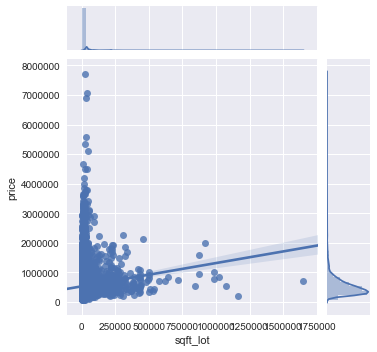

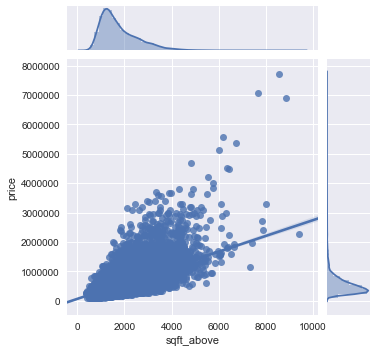

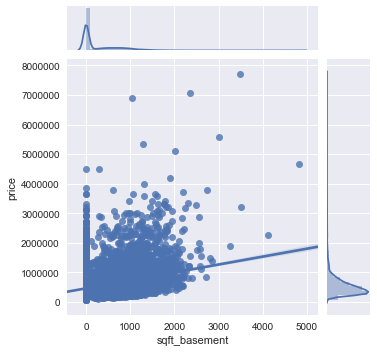

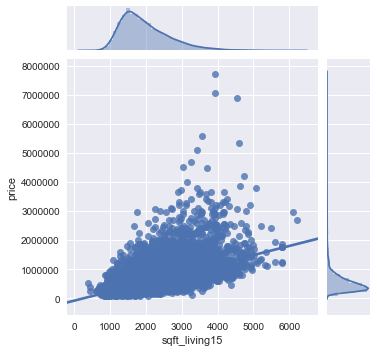

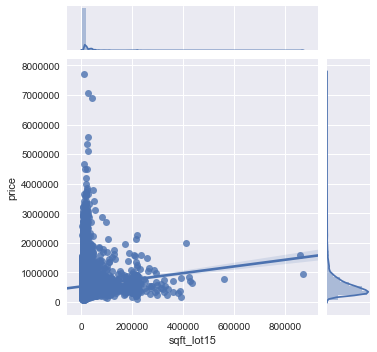

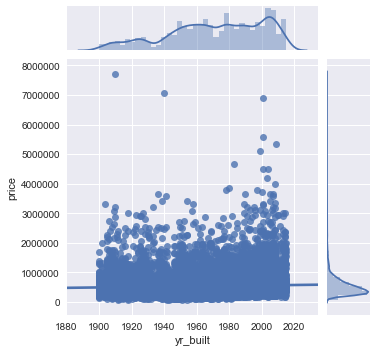

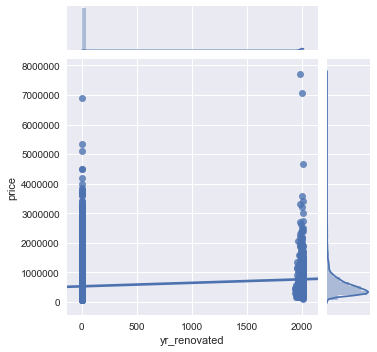

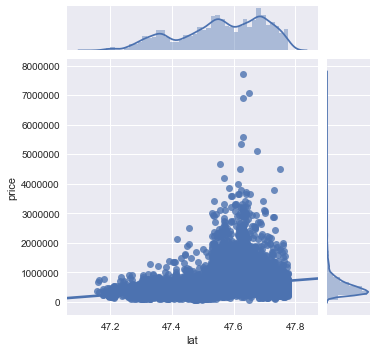

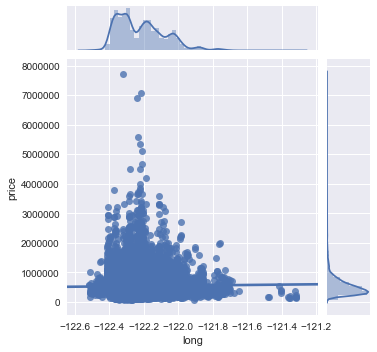

In [33]:
sns.jointplot(x="sqft_lot", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_above", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_basement", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_living15", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_lot15", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="yr_built", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="yr_renovated", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="lat", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="long", y="price", data=data, kind = 'reg', size = 5)
plt.show()

#### While most of the grpahs show linear relationships, 
#### sqft_lot, sqft_lot15 and yr_built seem to be poorly related to price.
#### We can see that there is a lot of zeros in the sqft_basement distribution (i.e., no basement). Similarly, there is a lot of zeros in the yr_renovated variable.

C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


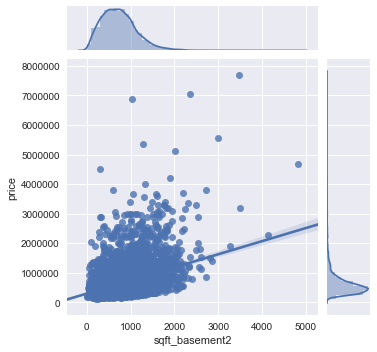

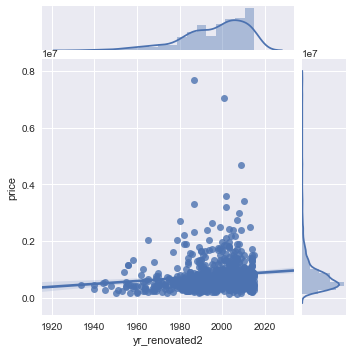

In [31]:
# Create 2 new columns for the analysis 
data['sqft_basement2'] = data['sqft_basement'].apply(lambda x: x if x > 0 else None)
data['yr_renovated2'] = data['yr_renovated'].apply(lambda x: x if x > 0 else None)

# Show the new plots with paerson correlation
sns.jointplot(x="sqft_basement2", y="price", data=data, kind = 'reg', dropna=True, size = 5)
sns.jointplot(x="yr_renovated2", y="price", data=data, kind = 'reg', dropna=True, size = 5)
plt.show()

In [32]:
# For analysis purpose, create additional columns indicating if a house has basement or if a house has been renovated.

data['basement_present'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
data['basement_present'] = data['basement_present'].astype('category', ordered = False)

data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
data['renovated'] = data['renovated'].astype('category', ordered = False)

C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
C:\Users\jjsjk\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


In [36]:
data.isna().sum()

id                      0
date                    0
price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront              0
view                    0
condition               0
grade                   0
sqft_above              0
sqft_basement           0
yr_built                0
yr_renovated         3742
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
sqft_basement2      12798
yr_renovated2       20360
basement_present        0
renovated               0
dtype: int64